In [1]:
import pandas as pd
import requests
import json
import time
import datetime
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import os

In [2]:
# Env data

fname = '/Users/xangma/environmentaldata.csv'
df_env = pd.read_csv(fname,parse_dates=True, low_memory=False)

df_env['sample.sampleDateTime'] = pd.to_datetime(df_env['sample.sampleDateTime'],format= '%Y-%m-%d %H:%M:%S')
df_env['Timestamp'] = df_env['sample.sampleDateTime'].map(pd.Timestamp.timestamp)
df_env['sampleDateTime'] = df_env['sample.sampleDateTime']

In [4]:
# Southern Water Data

fname = '/Users/xangma/southern-water_spill-data_2017-20.csv'
df_sw = pd.read_csv(fname,parse_dates=True)

df_sw.loc[df_sw['Start Time'].str.len() < 8, 'Start Time'] = df_sw['Start Time'] + ':00'
df_sw.loc[df_sw['End Time'].str.len() < 8, 'End Time'] = df_sw['End Time'] + ':00'

df_sw['StartDateTime'] = df_sw['Start Date'] + ' ' +  df_sw['Start Time']
df_sw['EndDateTime'] = df_sw['End Date'] + ' ' +  df_sw['End Time']

df_sw['StartDateTime'] = pd.to_datetime(df_sw['StartDateTime'],format= '%d/%m/%Y %H:%M:%S')
df_sw['EndDateTime'] = pd.to_datetime(df_sw['EndDateTime'],format= '%d/%m/%Y %H:%M:%S')

In [5]:
df_env

,id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,...,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,yr,month,day,Timestamp,sampleDateTime
0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,BOD ATU,BOD : 5 Day ATU,85,<,3.00,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22,9.537210e+08,2000-03-22 10:30:00
1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,0.50,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22,9.537210e+08,2000-03-22 10:30:00
2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,Chloride Ion,Chloride,172,NaN,14.10,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22,9.537210e+08,2000-03-22 10:30:00
3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,pH,pH,61,NaN,7.15,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22,9.537210e+08,2000-03-22 10:30:00
4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,COD as O2,Chemical Oxygen Demand :- {COD},92,NaN,27.00,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22,9.537210e+08,2000-03-22 10:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764740,NaN,http://environment.data.gov.uk/water-quality/i...,SW-Z9420104,URCHFONT STW (HUMUS),2020-03-03 08:35:00,Sld Sus@105C,"Solids, Suspended at 105 C",135,<,5.00,...,FINAL SEWAGE EFFLUENT,True,WATER QUALITY OPERATOR SELF MONITORING COMPLIA...,403930.0,157510,2020,3,3,1.583224e+09,2020-03-03 08:35:00
7764741,NaN,http://environment.data.gov.uk/water-quality/i...,SW-Z9420104,URCHFONT STW (HUMUS),2020-03-03 08:35:00,pH,pH,61,NaN,7.96,...,FINAL SEWAGE EFFLUENT,True,WATER QUALITY OPERATOR SELF MONITORING COMPLIA...,403930.0,157510,2020,3,3,1.583224e+09,2020-03-03 08:35:00
7764742,NaN,http://environment.data.gov.uk/water-quality/i...,SW-Z9420104,URCHFONT STW (HUMUS),2020-03-03 08:35:00,BOD ATU,BOD : 5 Day ATU,85,<,6.00,...,FINAL SEWAGE EFFLUENT,True,WATER QUALITY OPERATOR SELF MONITORING COMPLIA...,403930.0,157510,2020,3,3,1.583224e+09,2020-03-03 08:35:00
7764743,NaN,http://environment.data.gov.uk/water-quality/i...,SW-Z9420104,URCHFONT STW (HUMUS),2020-03-03 08:35:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,0.20,...,FINAL SEWAGE EFFLUENT,True,WATER QUALITY OPERATOR SELF MONITORING COMPLIA...,403930.0,157510,2020,3,3,1.583224e+09,2020-03-03 08:35:00


In [6]:
df_sw

,Site Number,Site Name,County,Folio Schedule,EA Number,Schedule Type,Year,Start Date,Start Time,End Date,End Time,Spill Count,Discharge Duration (hours),Discharge Period (hours),Catchment,StartDateTime,EndDateTime
0,103283,ABBEY ROAD FAVERSHAM CSO,KENT,A01377 / 1,A1377/K/05,Storm,2017,12/01/2017,14:35:58,12/01/2017,23:41:52,1,3.14,9.10,NaN,2017-01-12 14:35:58,2017-01-12 23:41:52
1,103283,ABBEY ROAD FAVERSHAM CSO,KENT,A01377 / 1,A1377/K/05,Storm,2017,17/05/2017,18:30:05,18/05/2017,22:31:54,2,4.33,28.03,NaN,2017-05-17 18:30:05,2017-05-18 22:31:54
2,103283,ABBEY ROAD FAVERSHAM CSO,KENT,A01377 / 1,A1377/K/05,Storm,2017,06/06/2017,09:11:33,06/06/2017,10:03:21,1,0.86,0.86,NaN,2017-06-06 09:11:33,2017-06-06 10:03:21
3,103283,ABBEY ROAD FAVERSHAM CSO,KENT,A01377 / 1,A1377/K/05,Storm,2017,27/06/2017,20:56:59,27/06/2017,22:07:46,1,1.18,1.18,NaN,2017-06-27 20:56:59,2017-06-27 22:07:46
4,103283,ABBEY ROAD FAVERSHAM CSO,KENT,A01377 / 1,A1377/K/05,Storm,2017,12/07/2017,05:22:19,12/07/2017,05:43:35,1,0.35,0.35,NaN,2017-07-12 05:22:19,2017-07-12 05:43:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27317,111906,YORK ROAD BEXHILL CSO [111906],EAST SUSSEX,A01265,A1265/S/05,Storm Sewage,Storm,24/09/2020,07:02:23,24/09/2020,09:05:00,1,2.04,2.04,NaN,2020-09-24 07:02:23,2020-09-24 09:05:00
27318,111906,YORK ROAD BEXHILL CSO [111906],EAST SUSSEX,A01265,A1265/S/05,Storm Sewage,Storm,25/10/2020,11:29:00,25/10/2020,12:22:00,1,0.88,0.88,NaN,2020-10-25 11:29:00,2020-10-25 12:22:00
27319,111906,YORK ROAD BEXHILL CSO [111906],EAST SUSSEX,A01265,A1265/S/05,Storm Sewage,Storm,15/11/2020,07:30:01,15/11/2020,11:42:22,1,4.21,4.21,NaN,2020-11-15 07:30:01,2020-11-15 11:42:22
27320,111906,YORK ROAD BEXHILL CSO [111906],EAST SUSSEX,A01265,A1265/S/05,Storm Sewage,Storm,04/12/2020,02:32:00,04/12/2020,06:57:00,1,4.42,4.42,NaN,2020-12-04 02:32:00,2020-12-04 06:57:00


In [7]:
# Filter down to langstone/portsmouth only

langdf_env = df_env[(df_env['sample.samplingPoint.label'].str.contains('LANGSTONE')) & (df_env['sampleDateTime'].dt.year >= 2017) & (df_env['sampleDateTime'].dt.year <= 2020)].copy()

langdf_sw = df_sw[(df_sw['Site Name'].str.contains('PORTSMOUTH')) & (df_sw['County'] == 'HAMPSHIRE')].copy()

# add 24 hours to sw end dates

langdf_sw['EndDateTime_plus1'] = langdf_sw['EndDateTime'] + datetime.timedelta(days=1)

# Sort data
langdf_env = langdf_env.sort_values('sampleDateTime')

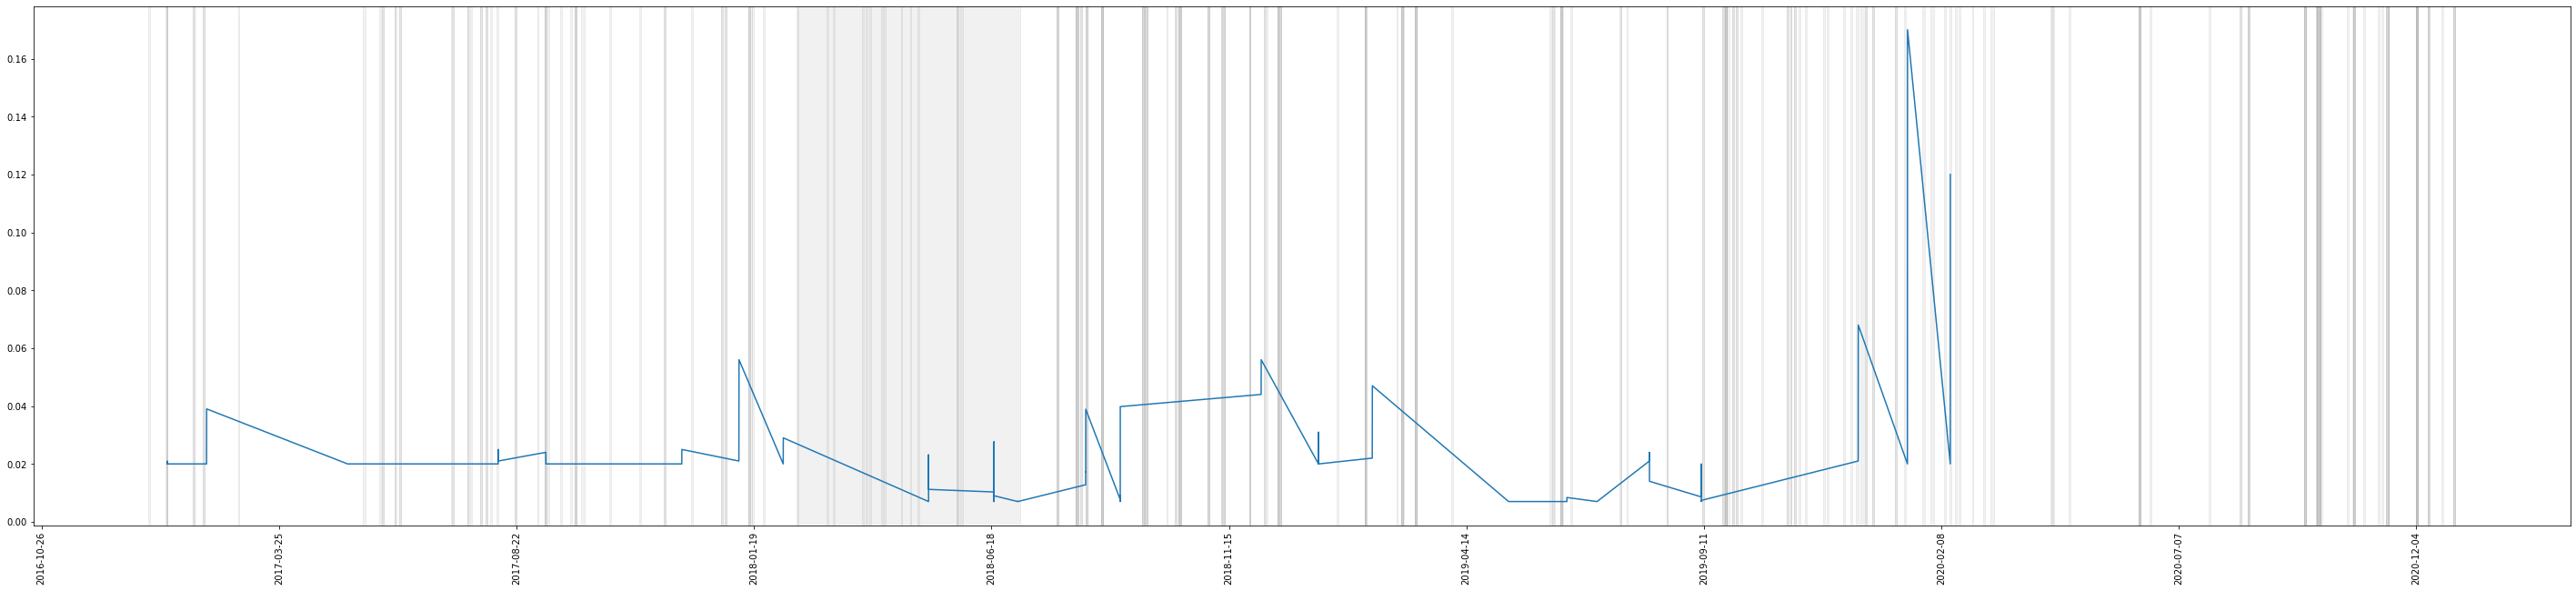

In [10]:
def plotwithswbars(langdf_env, deter):
    fig, ax = plt.subplots()
    fig.set_size_inches(50., 10.5)
    langdf_env = langdf_env[langdf_env['determinand.label'] == deter]

    ax.plot(langdf_env['sampleDateTime'], langdf_env['result'], color='C0')

    # Plot bars
    for i, row in langdf_sw.iterrows():
        try:
            ax.axvspan(row['StartDateTime'], row['EndDateTime_plus1'], alpha=0.1, color='C7')
        except:
            pass
    
    # Vertical x ticks and limit to 15 in total
    plt.xticks(rotation='vertical')
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    # plt.show()
    plt.savefig('/Users/xangma/environmentalplots/' + deter + '.png')
    plt.close()


plotwithswbars(langdf_env, 'NH3 filt N')


In [ ]:
# Plot every determinand in a loop
dets = langdf_env['determinand.label'].unique()
for i in range(len(dets)):
    plotwithswbars(langdf_env, dets[i])

In [ ]:
# # Join dataframes where the times are between the spillage times

# conn = sqlite3.connect(':memory:')
# #write the tables
# langdf_env.to_sql('env', conn, index=False)
# langdf_sw.to_sql('sw', conn, index=False)


# qry = '''
#     select  
#         *
#     from
#         env left join sw on
#         env.sampleDateTime between sw.StartDateTime and sw.EndDateTime_plus1 
#     '''
# df = pd.read_sql_query(qry, conn)

# # Object types will be lost, gotta convert back to datetimes

# df['StartDateTime'] = pd.to_datetime(df['StartDateTime'])
# df['EndDateTime'] = pd.to_datetime(df['EndDateTime'])
# df['EndDateTime_plus1'] = pd.to_datetime(df['EndDateTime_plus1'])
# df['sampleDateTime'] = pd.to_datetime(df['sampleDateTime'])

# # Sort
# df = df.sort_values('sampleDateTime')

# # Save
# df.to_csv('matcheddata.csv')

In [8]:
# Get data from southern water

# baseurl = 'https://www.southernwater.co.uk/gateway/Beachbuoy%20API/api/v1.0/Spills/GetHistoricSpills?page='
# npages=505

# resarr = []
# for i in range(0,npages):
#     r=requests.get(baseurl + str(i+1), headers={"x-gateway-apikey":"df32a632-3c29-4371-af71-3361b27d5baa"})
#     data = json.loads(r.content.decode('utf8'))
#     print(i)
#     resarr.extend(data['items'])
#     time.sleep(.1)

# with open('sw_data.json', 'w', encoding='utf-8') as f:
#     json.dump(resarr, f, ensure_ascii=False, indent=4)